# SQL

## Data Query Language (DQL)
A instrução DQL em SQL é `SELECT`, a qual sempre está acompanhada das cláusulas `FROM`; quando há necessidade de filtro, agrupamento e ordenação acompanhada de `WHERE`, `GROUP BY` e `DESC`.

### MOSTRAR TODAS AS BASES DE DADOS PRESENTES

- **MySQL**

In [ ]:
SHOW DATABASES;

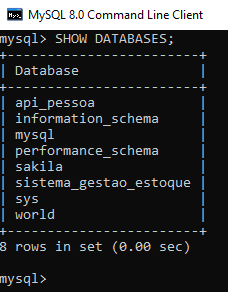

- **Microsoft SQL Server**

In [ ]:
SELECT * FROM SYS.DATABASES;

- **PostgreSQL**

In [ ]:
SELECT datname AS database_name

FROM pg_database

WHERE datistemplate = false;

### MOSTRAR OS DADOS DE UMA TABELA

Para realizar operações uma tabela de uma base de dados, antes é necessário selecionar a base de dados através do comando `USE <database_name>;`. Para mostrar todos os dados de todas as colunas de uma banco de dados, usamos o comando `SELECT * FROM <table_name>;`.

O código a seguir irá selecionar a base de dados `sakila`, disponível no sistema gerenciador de bancos de dados (SGBD) MySQL, após irá mostrar os dados de todas as colunas da table `customer`.

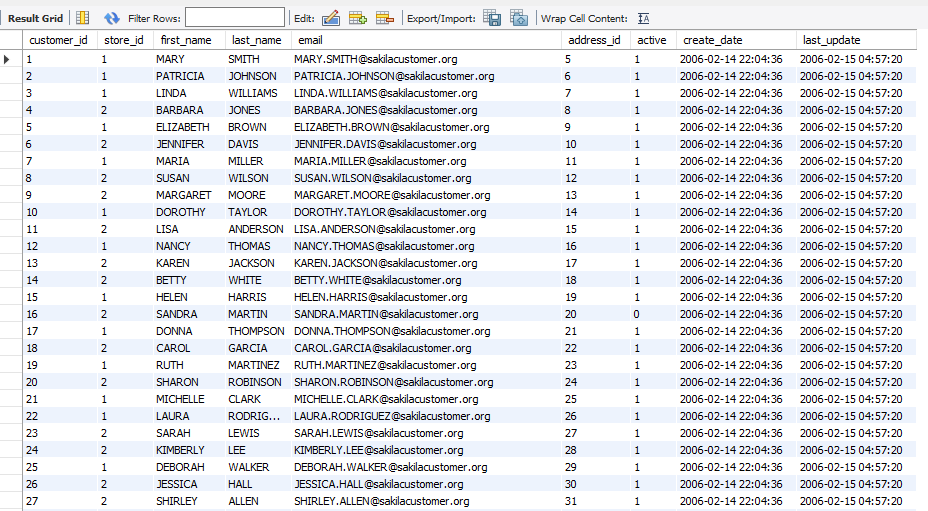

### LIMITAR O NÚMERO DE LINHAS NA SAÍDA DA QUERY

A tabela `customer` possui apenas 599 linhas e o SGBD não demorar em retornar o resultado da query `SELECT * FROM customer;`, no entanto, há casos em que há um número muito grande registros que irá impactar no tempo de resposta e devido ao número significativo de registros, não é necessário visualizar todos.

Para evitar ter que aguardar que o SGBD mostre todos os milhares de registros de uma tabela, podemos mostrar apneas um determinado número de registros. O código a seguir demonstra como selecionar apenas 15 registros da tabela `customar`:

- **MySQL**

In [ ]:
USE sakila;

SELECT * FROM customer
LIMIT 15;

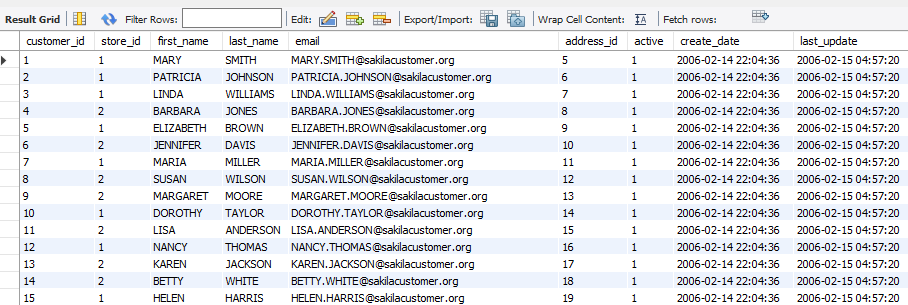

- **Microsoft SQL Sserver**: usando a tabela `countries` da base de dados `Northwind`, o código seria:

In [ ]:
USE Northwind

SELECT TOP(15) FROM countries;

A cláusula `TOP` é uma extensão proprietária da Microsoft para a intrução `SELECT`. `TOP` permite especificar quantas linhas serão retornadas, como um inteiro positivo ou como uma porcentagem de todas as linhas qualificadas. O número de linhas pode ser especificado como uma constante ou como uma expressão.

Para retornar uma porcentagem das linhas qualificadas, use a opção PERCENT com TOP em vez de um número fixo.


In [ ]:
USE ContosoRetailDW;

SELECT TOP 1 PERCENT
	SalesKey,
	UnitPrice,
	SalesAmount
FROM FactSales;

- **Oracle**

In [ ]:
SELECT 
    first_name AS "primeiro nome", 
    email AS "e-mail", 
    salary AS "salário (R$)"
FROM employees
FETCH FIRST 10 ROWS ONLY;

Também é possível mostrar um determinado número de registros a partir de uma determinada linha, por exemplo: podemos pedir para mostrar 15 registros a partir da linha 15:

In [ ]:
USE sakila;

SELECT * FROM customer
LIMIT 15
OFFSET 15;

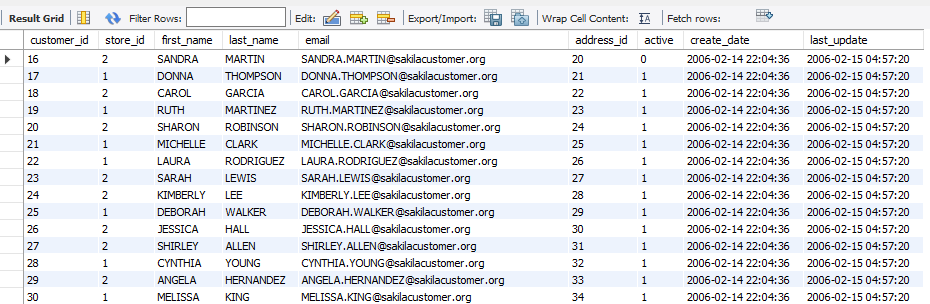

### SELECIONAR COLUNAS

Para selecionar colunas, basta informar os nomes das colunas separadas por vírgula

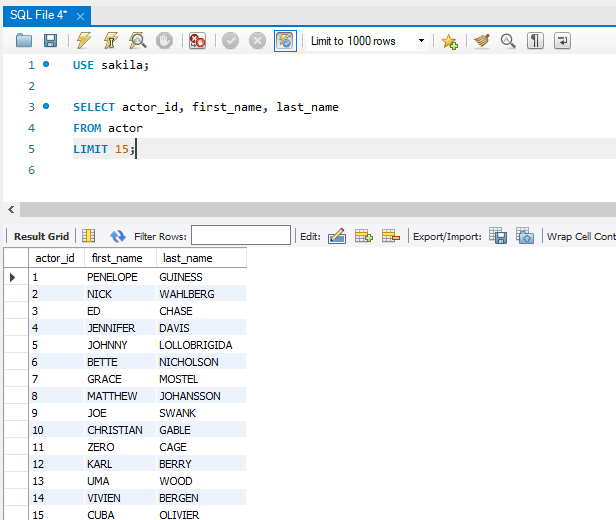

### FILTRAR DADOS

Para filtrar dados em SQL usamos a cláusula `WHERE`. No exemplo a seguir, é demonstrado como filtrar todos os atores cujo primeiro nome seja "Mary":

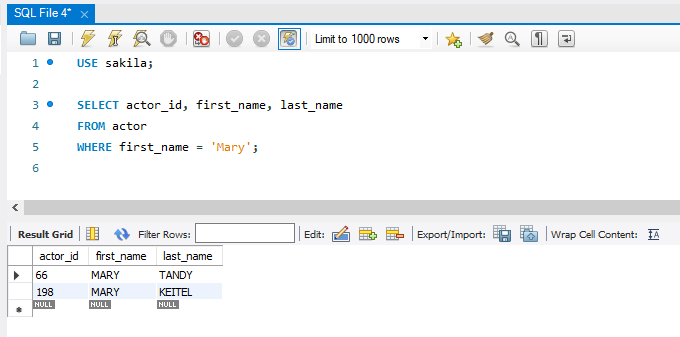

- Filtrar registros com base em vários valores possíveis

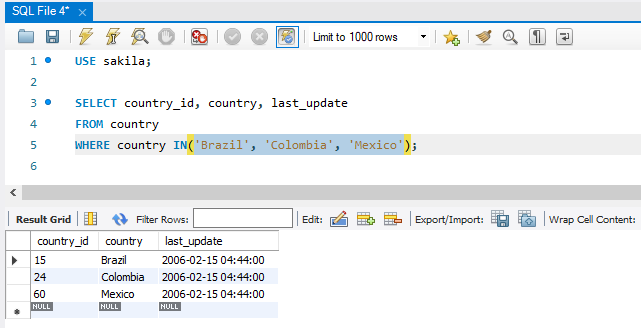

- Filtrar registros que contenham determinados caracteres ou padrões, em vez de uma correspondência exata:

O operador `LIKE` em SQL é usada para realizar correspondências parciais em uma coluna de texto, com base em um padrão especificado.

O exemplo a seguir mostrar como filtar os atores cujo sobrenome termina com as letras "ey":

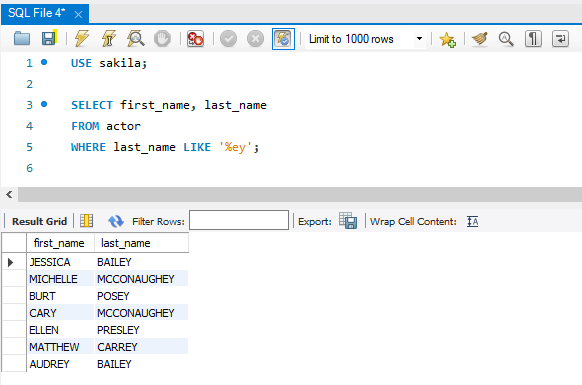

Neste exemplo, o caractere `%` é um curinga que corresponde a zero, um ou vários caracteres.

A estrutura da cláusula `WHERE` é composta de uma ou mais condições de pesquisa, cada uma das quais deve ser avaliada como `TRUE`, `FALSE` ou `UNKNOWN` para cada registro da tabela. Os registros somente serão retornadas quando a cláusula `WHERE` for avaliada como `TRUE`. As condições individuais atuam como filtros nos dados e são conhecidas como "predicados". Cada predicado inclui uma condição que está sendo testada, geralmente usando os operadores de comparação básicos:

- `<>` ou `\!=`: Usado para verificar se dois valores são diferentes.

- `>`: Usado para verificar se um valor é maior que outro.

- `<`: Usado para verificar se um valor é menor que outro.

- `>=`: Usado para verificar se um valor é maior ou igual a outro.

- `<=`: Usado para verificar se um valor é menor ou igual a outro.

- `AND`: Usado para combinar duas ou mais condições, e a linha será selecionada apenas se todas as condições forem verdadeiras.

- `OR`: Usado para combinar duas ou mais condições, e a linha será selecionada se qualquer uma das condições for verdadeira.

Além dos operadores acima citados, vários predicados podem ser combinados com os operadores `AND` e `OR` e com parênteses.

- `BETWEEN`: Usado para verificar se um valor está dentro de um intervalo especificado.

- `LIKE`: Este predicado é usado para buscar um padrão em uma coluna.

- `IN`: Este predicado é usado para verificar se um valor corresponde a qualquer valor em uma lista.

- `NOT`: Usado para negar uma condição.

- `IS NULL` e `IS NOT NULL`: Usados para verificar se um valor é `NULL` ou não.

- `EXISTS`: Este predicado é usado para verificar a existência de linhas retornadas por uma subconsulta.

- `CONTAINS` e `FREETEXT`: Estes predicados são específicos do [SQL Server](https://learn.microsoft.com/pt-br/sql/t-sql/queries/predicates?view=sql-server-ver16) e são usados para realizar pesquisas de texto completo.

`CONTAINS` e `FREETEXT` são predicados poderosos para pesquisar texto que vai além das capacidades do comando `LIKE` tradicional, permitindo que você pesquise palavras e frases aproximadas, sinônimos, inflexões gramaticais e muito mais.

O código a seguir mostra um exemplo de uma consulta SQL no SQL Server que usa o predicado `FREETEXT` para realizar uma pesquisa de texto completo na coluna `Description` da tabela `ProductDescription` na base de dados `AdventureWorks2022`.

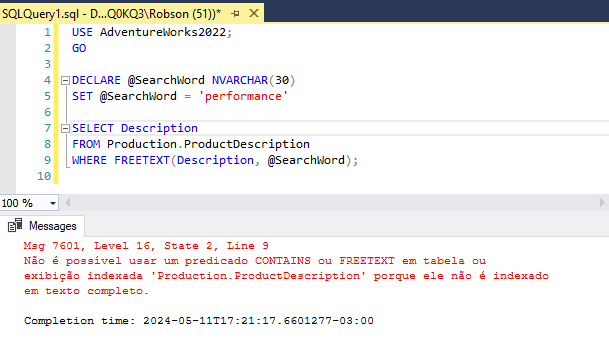

A menssagem de error acima indica que os predicados `CONTAINS` e `FREETEXT` só podem ser usados em colunas que estão indexadas para pesquisa de texto completo.
Para resolver esse problema, você precisará criar um índice de texto completo na tabela Production.ProductDescription. No SQL Server, você pode fazer isso usando o SQL Server Management Studio (SSMS) ou escrevendo um script SQL para criar o índice. Os códigos a seguir mostram como [configurar e indexar uma tabela para usar o predicado `FREETEXT`](https://learn.microsoft.com/pt-br/sql/relational-databases/search/get-started-with-full-text-search?view=sql-server-ver16).

In [ ]:
-- 1. Criar um catálogo de texto completo denominado AdvWksProDesc
USE AdventureWorks;  
GO  

CREATE FULLTEXT CATALOG AdvWksProDesc;

In [ ]:
-- 2. Criar um índice exclusivo
CREATE UNIQUE INDEX ui_ukDoc ON Production.ProductDescription(ProductDescriptionID);

In [ ]:
-- 3. Criar um índice de texto completo na tabela Production.ProductDescription
CREATE FULLTEXT INDEX ON Production.ProductDescription  
(  
    Description                      --Full-text index column name   
        TYPE COLUMN FileExtension    --Name of column that contains file type information  
        Language 2057                --2057 is the LCID for British English  
)  
KEY INDEX ui_ukDoc ON AdvWksProDesc  --Unique index  
WITH CHANGE_TRACKING AUTO            --Population type;  
GO

### ORDENAR DADOS

A ordenação em SQL é feita através da cláusula `ORDER BY`. O exemplo a seguir mostrar como ordenar os nomes dos autores em ordem alfabética:

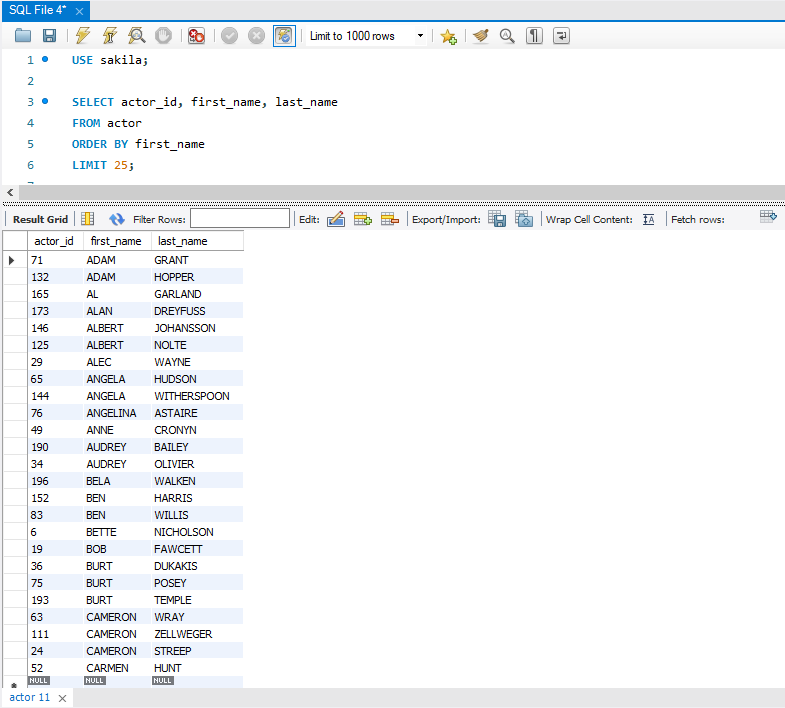

Por padrão `ORDER BY` ordena em ordem crescente, para ordenar em ordem decrescente usa-se a cláusula `DESC`:

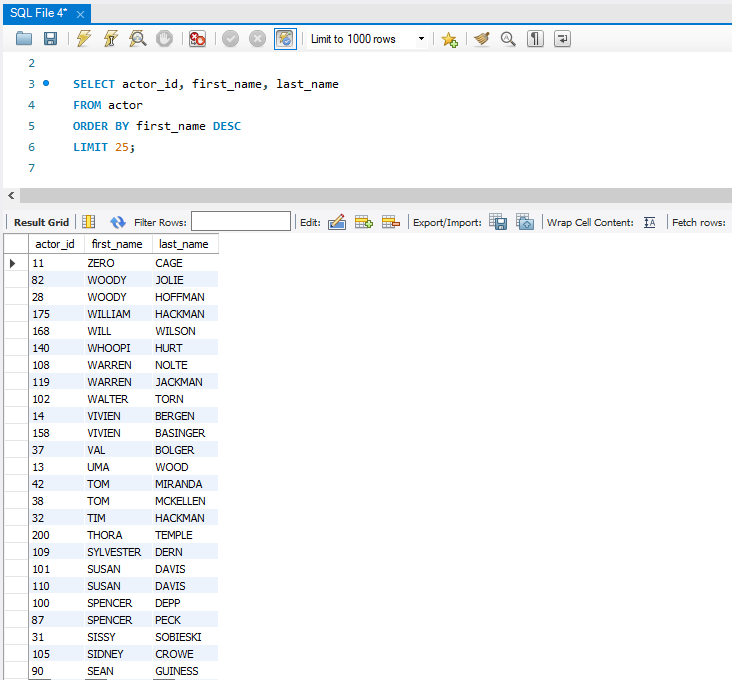

Na ordem lógica do processamento de consulta, ORDER BY é a última fase a ser executada de uma instrução SELECT.

### DADOS DISTINTOS

A imagem a seguir, mostra o resultado de uma _query_ na tabela `Suppliers` do banco de dados `Nortwind`, o resultado mostra 29 registros de fornecedores, onde é possível observar que há vários fornecedores no mesmo país. Imagine que há necesidade de ter uma lista dos países dos fornecedores, para isso deve-se obter apenas os valores distintos para a coluna `Country`.

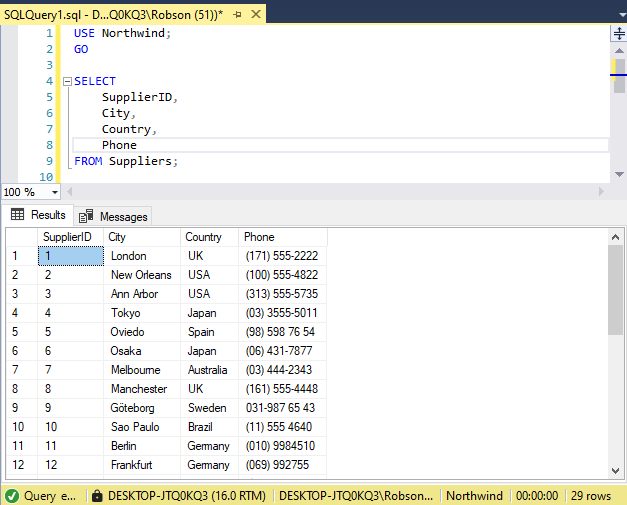

A figura abaixo mostra como **remover valores duplicados** através da cláusula `DISTINCT`, que é uma funcionalidade padrão em muitos Sistemas de Gerenciamento de Banco de Dados (SGBD), incluindo Oracle, PostgreSQL, MySQL, SQL Server, entre outros.

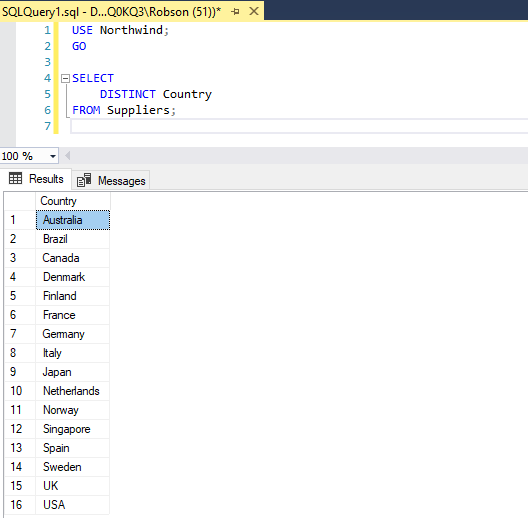

<p style="text-align: justify">É importante notar que a cláusula <mark>DISTINCT</mark> tem suas limitações. Por exemplo, ela não pode filtrar dados duplicados com base em colunas específicas quando outras colunas em uma tabela possuem valores diferentes. Além disso, o uso de <mark>DISTINCT</mark> pode ter um impacto no desempenho da consulta, especialmente em tabelas grandes, pois o SGBD precisa fazer um trabalho extra para remover as duplicatas.</p>

<p style="text-align: justify">Portanto, é recomendado usar a cláusula <mark>DISTINCT</mark> com cuidado e apenas quando necessário. Em alguns casos, pode ser mais eficiente usar a cláusula <mark>GROUP BY</mark> ou outras técnicas para alcançar o mesmo resultado.</p>

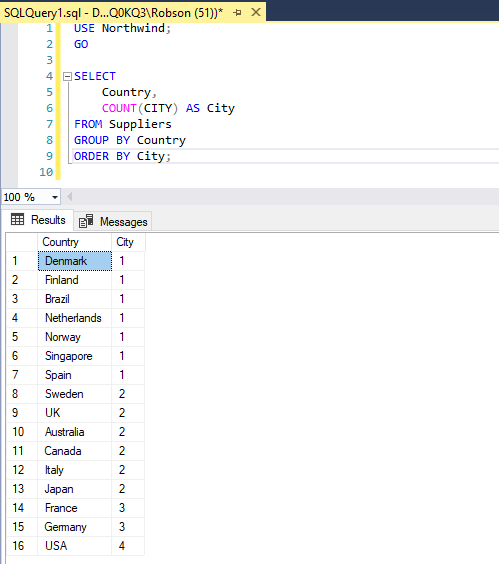

### JOIN

A instrução `JOIN` em SQL é usada para combinar linhas de duas ou mais tabelas, com base em uma coluna relacionada (comun) entre elas. Isso é especialmente útil em bancos de dados relacionais, onde as informações desejadas são frequentemente armazenadas em várias tabelas.

Assim, a instrução `JOIN` em SQL é utilizada para fazer operações de conjunto nos dados de tabelas, seus tipos são:
- `INNER_JOIN`: Retorna apenas os registros comuns em ambas as tabelas;
- `LEFT JOIN`: Retorna todos os registros da tabela à esquerda e os registros correspondentes da tabela à direita. Se não houver correspondência, o resultado é `NULL` do lado direito;
- `RIGHT JOIN`: Retorna todos os registros da tabela à direita e os registros correspondentes da tabela à esquerda. Se não houver correspondência, o resultado é `NULL` do lado esquerdo;
- `FULL JOIN`:  Retorna todos os registros quando há uma correspondência em qualquer uma das tabelas à esquerda ou à direita;
- `CROSS JOIN`: Retorna o produto cartesiano de registros de tabelas.

Tomemos como exemplo as tabelas `country` e `city` da base de dados `sakila` presente no SGBD MySQL.

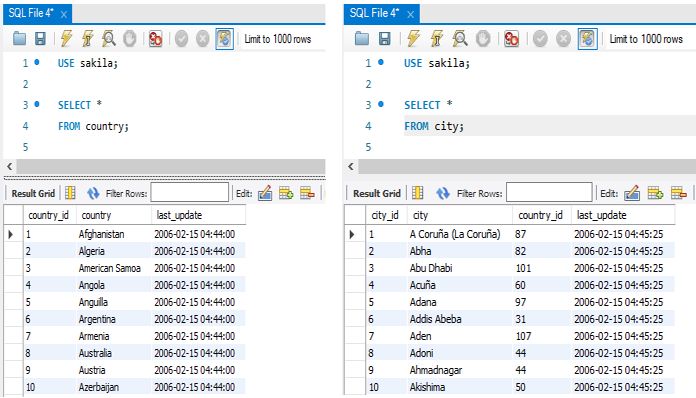

Para realizar uma _query_ que retorne o nome de cada país e as cidades de cada país, é necessário juntar estas duas tabelas, tomando `country_id` como coluna de referência.

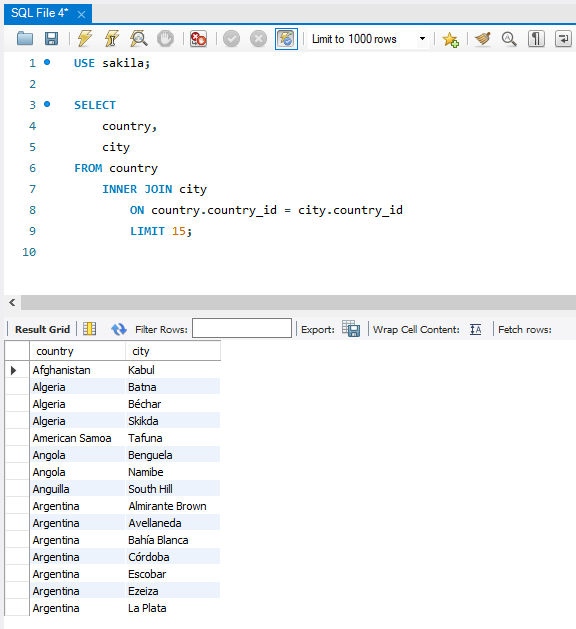

- **Oracle Database**

No Oracle a sintaxe anterior, utilizada no MySQL, SQL Server e PostgreSQL, irá rodar sem problemas, no entanto, o Oracle permite uma sintaxe mais leve, através do uso da cláusula `USING`.

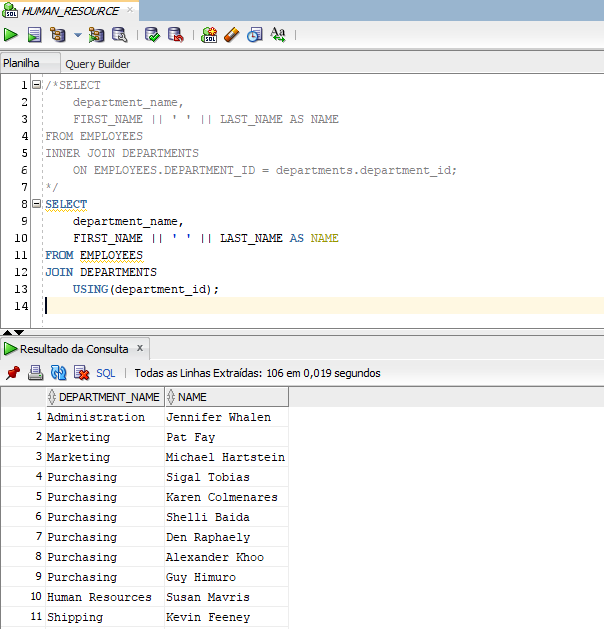

### OBTER O NÚMERO DE TABELAS DE UMA BASE DE DADOS

- **Microsoft SQL Server**

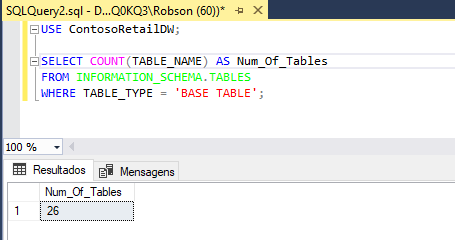

- **MySQL**

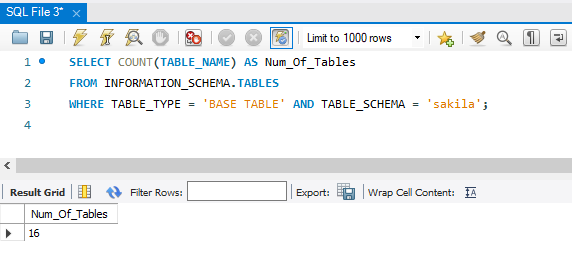

- **PostgreSQL**

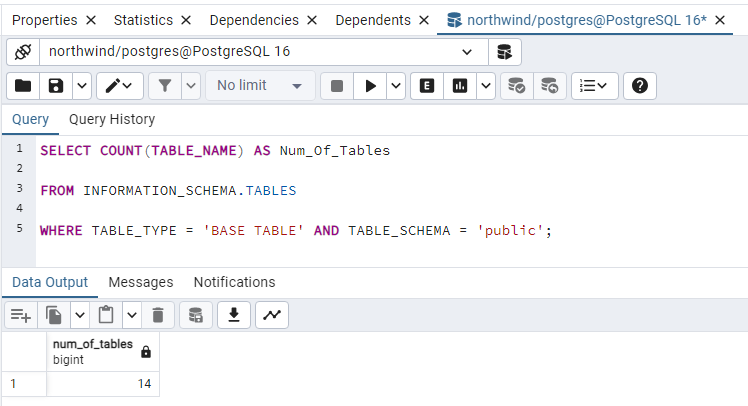

### OBTER O NÚMERO DE COLUNAS DE UMA TABELA

- **Microsoft SQL Server**

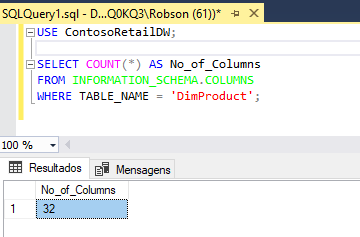

- **MySQL**

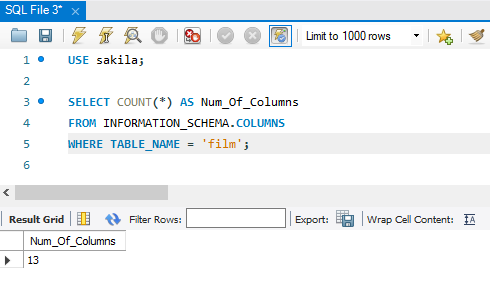

- **PostgreSQL**

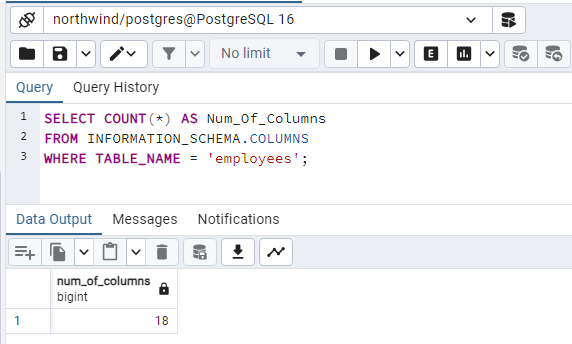

- **Oracle**

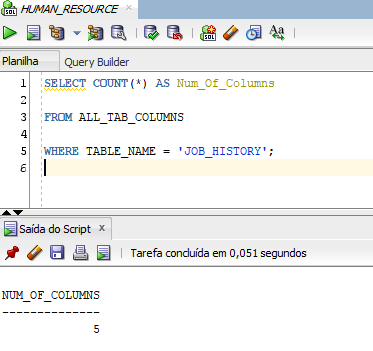

### OBTER LISTA DAS TABELAS DE UM BANCO DE DADOS

- **SQL Server e MySQL**

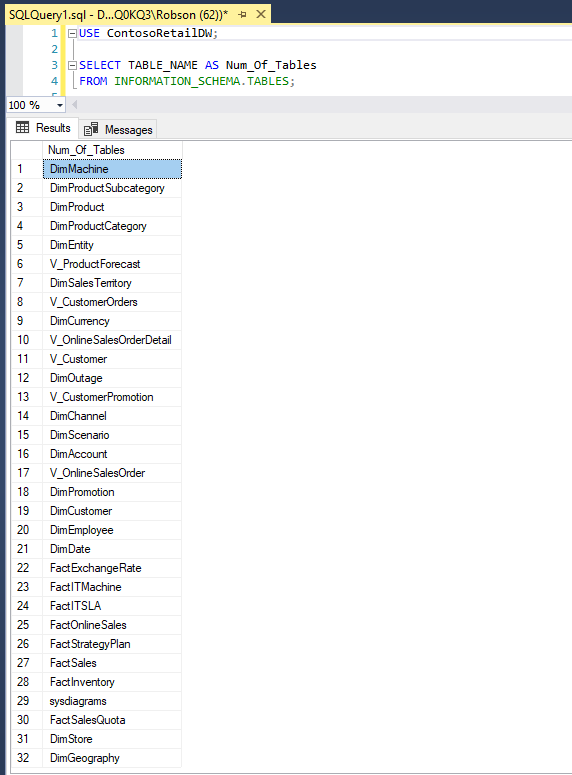

- **PostgreSQL**

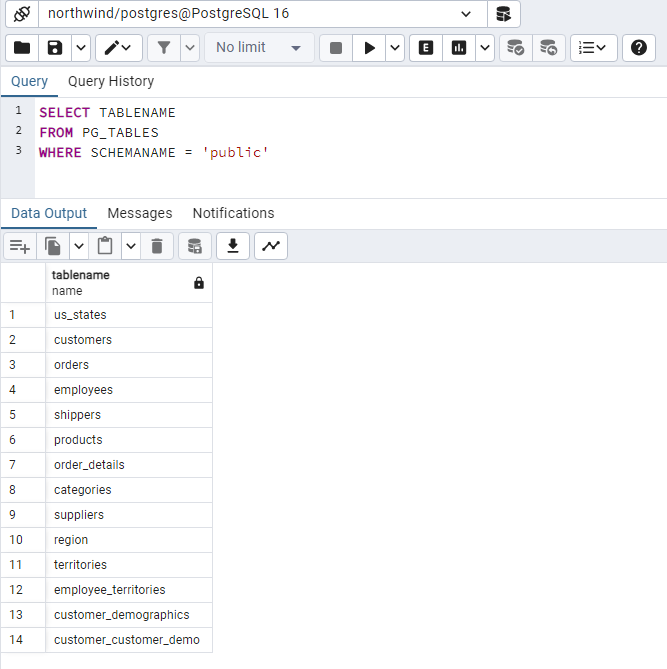

- **Oracle**

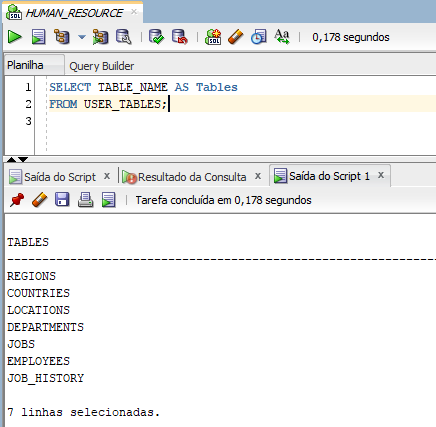

### OBTER O NÚMERO DE VIEWS DE UMA BASE DE DADOS

- **Microsoft SQL Server**

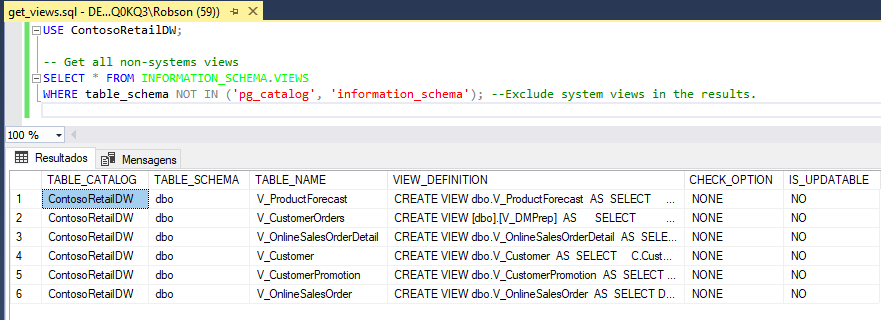

- **MySQL**

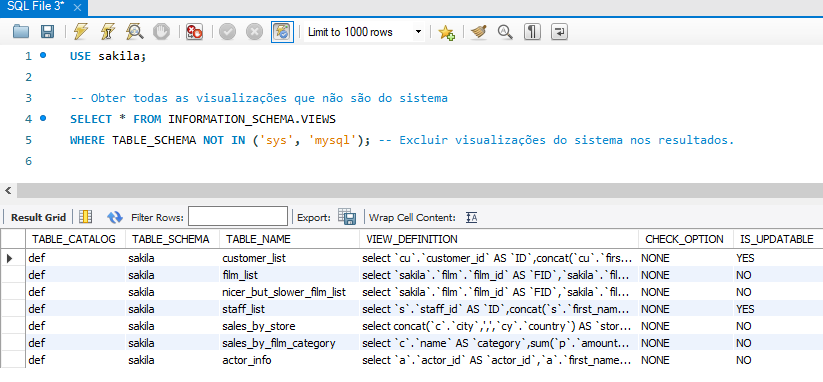

### CONCATENAR DADOS

No MySQL, Microsoft SQL Server, PostgreSQL e Oracle, usa-se a cláusula `CONCAT` para fazer concatenação de strings.

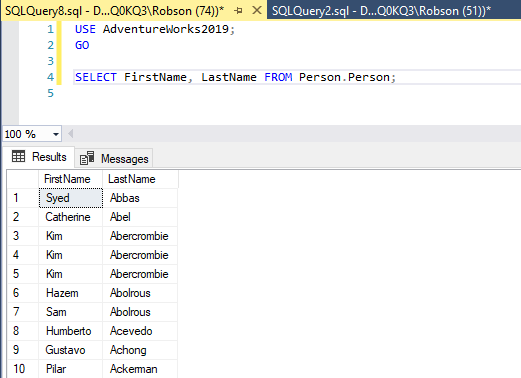

A instrução `GO` em T-SQL não é obrigatória, mas é comumente usada para separar lotes de comandos SQL. O `GO` não é uma instrução SQL padrão; é um separador de lotes reconhecido pelo utilitário de linha de comando do SQL Server e por ferramentas de administração como o SQL Server Management Studio (SSMS).

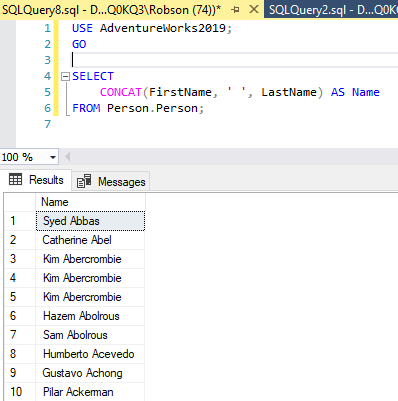

- Exemplo usando **Oracle**:

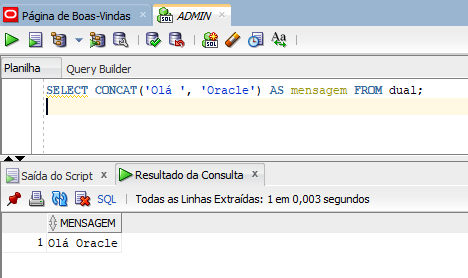

`dual` é uma tabela especial no Oracle que consiste em uma única coluna e uma única linha. É frequentemente usada em consultas quando você não precisa selecionar dados de uma tabela real, mas precisa de uma cláusula `FROM` para a consulta ser válida no Oracle. 

A cláusula `CONCAT`, no Oracle, não funciona com colunas, devendo ser utilizado o operador `||` para concatenação de colunas:

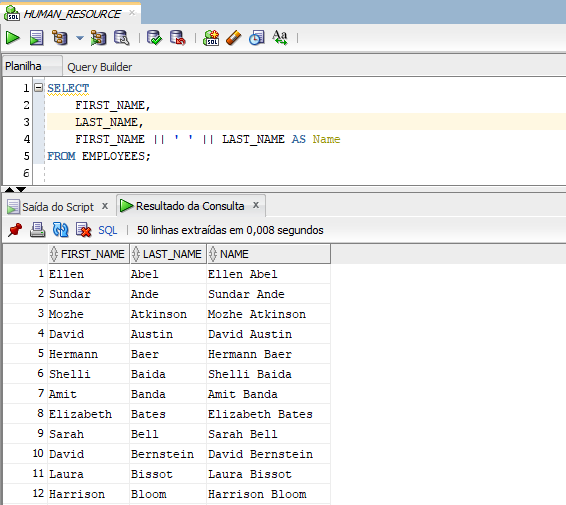

#### CONCATENAR COM APOSTROFE NO ORACLE

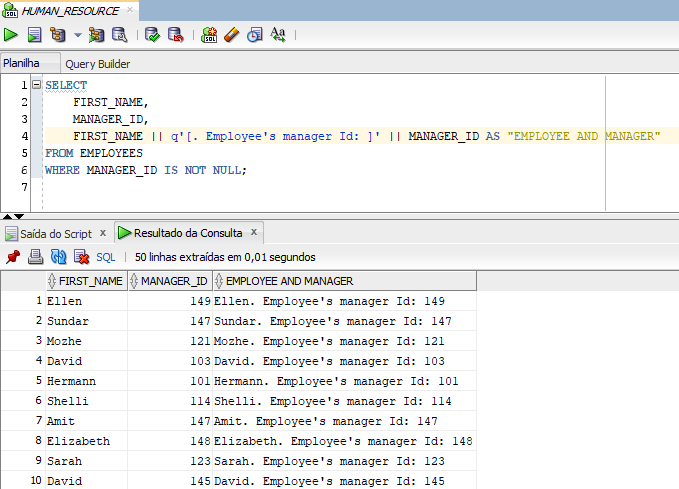